In [34]:
import pandas as pd

# network analysis
import networkx as nx

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud, STOPWORDS

In [5]:
# load data
kaminski_parsed = pd.read_csv('../data/kaminski_parsed.csv')
kaminski_edges = pd.read_csv('../data/kaminski_edges.csv')
lay_parsed = pd.read_csv('../data/lay_parsed.csv')
lay_edges = pd.read_csv('../data/lay_edges.csv')
skilling_parsed = pd.read_csv('../data/skilling_parsed.csv')
skilling_edges = pd.read_csv('../data/skilling_edges.csv')

### Explore Kaminski data

In [6]:
kaminski_parsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8644 entries, 0 to 8643
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Message-ID                 8644 non-null   object 
 1   Date                       8644 non-null   object 
 2   From                       8644 non-null   object 
 3   To                         8626 non-null   object 
 4   Subject                    8267 non-null   object 
 5   Mime-Version               8644 non-null   float64
 6   Content-Type               8644 non-null   object 
 7   Content-Transfer-Encoding  8644 non-null   object 
 8   X-From                     8644 non-null   object 
 9   X-To                       8640 non-null   object 
 10  X-cc                       2896 non-null   object 
 11  X-bcc                      7 non-null      object 
 12  X-Folder                   8644 non-null   object 
 13  X-Origin                   8644 non-null   objec

In [7]:
kaminski_parsed.head(5)

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,Cc,Bcc
0,<28519439.1075856498412.JavaMail.evans@thyme>,"Mon, 7 May 2001 08:41:00 -0700 (PDT)",vince.kaminski@enron.com,"stephen.stock@enron.com, beth.perlman@enron.com",A resume for Londom,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,"Stephen Stock, Beth Perlman",NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,This is a resume of one guy I met in Houston a...,NaN,NaN
1,<27897591.1075856498629.JavaMail.evans@thyme>,"Mon, 7 May 2001 05:28:00 -0700 (PDT)",vince.kaminski@enron.com,vkaminski@aol.com,Btu's Weekly Power Report,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,vkaminski@aol.com,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,---------------------- Forwarded by Vince J Ka...,NaN,NaN
2,<28538884.1075856500656.JavaMail.evans@thyme>,"Mon, 30 Apr 2001 08:47:00 -0700 (PDT)",vince.kaminski@enron.com,vkaminski@aol.com,NaN,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,vkaminski@aol.com,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"http://www.x10.com/home/offer.cgi?!BF1,../blue...",NaN,NaN
3,<1815195.1075856526599.JavaMail.evans@thyme>,"Fri, 12 Jan 2001 08:07:00 -0800 (PST)",vince.kaminski@enron.com,stinson.gibner@enron.com,update on energy book,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,Vince J Kaminski,Stinson Gibner,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,FYI\n\nVince\n---------------------- Forwarded...,NaN,NaN
4,<7019447.1075856526621.JavaMail.evans@thyme>,"Fri, 12 Jan 2001 08:05:00 -0800 (PST)",vince.kaminski@enron.com,stinson.gibner@enron.com,update on energy book,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,Vince J Kaminski,Stinson Gibner,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,---------------------- Forwarded by Vince J Ka...,NaN,NaN


In [13]:
kaminski_parsed['Date'] = pd.to_datetime(kaminski_parsed['Date'], utc=True)

In [18]:
kaminski_parsed['Date'].describe()

/home/agnes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                          8644
unique                         4996
top       1999-12-17 15:17:00+00:00
freq                              6
first     1999-12-10 13:12:00+00:00
last      2002-01-30 22:26:13+00:00
Name: Date, dtype: object

In [32]:
kaminski_2001 = kaminski_parsed.loc[kaminski_parsed['Date'] >= '01-01-2001']
kaminski_2001.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3930 entries, 0 to 8643
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   Message-ID                 3930 non-null   object             
 1   Date                       3930 non-null   datetime64[ns, UTC]
 2   From                       3930 non-null   object             
 3   To                         3928 non-null   object             
 4   Subject                    3828 non-null   object             
 5   Mime-Version               3930 non-null   float64            
 6   Content-Type               3930 non-null   object             
 7   Content-Transfer-Encoding  3930 non-null   object             
 8   X-From                     3930 non-null   object             
 9   X-To                       3930 non-null   object             
 10  X-cc                       1211 non-null   object             
 11  X-bc

In [33]:
kaminski_2001

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,Cc,Bcc
0,<28519439.1075856498412.JavaMail.evans@thyme>,2001-05-07 15:41:00+00:00,vince.kaminski@enron.com,"stephen.stock@enron.com, beth.perlman@enron.com",A resume for Londom,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,"Stephen Stock, Beth Perlman",NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,This is a resume of one guy I met in Houston a...,NaN,NaN
1,<27897591.1075856498629.JavaMail.evans@thyme>,2001-05-07 12:28:00+00:00,vince.kaminski@enron.com,vkaminski@aol.com,Btu's Weekly Power Report,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,vkaminski@aol.com,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,---------------------- Forwarded by Vince J Ka...,NaN,NaN
2,<28538884.1075856500656.JavaMail.evans@thyme>,2001-04-30 15:47:00+00:00,vince.kaminski@enron.com,vkaminski@aol.com,NaN,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,vkaminski@aol.com,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,"http://www.x10.com/home/offer.cgi?!BF1,../blue...",NaN,NaN
3,<1815195.1075856526599.JavaMail.evans@thyme>,2001-01-12 16:07:00+00:00,vince.kaminski@enron.com,stinson.gibner@enron.com,update on energy book,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,Vince J Kaminski,Stinson Gibner,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,FYI\n\nVince\n---------------------- Forwarded...,NaN,NaN
4,<7019447.1075856526621.JavaMail.evans@thyme>,2001-01-12 16:05:00+00:00,vince.kaminski@enron.com,stinson.gibner@enron.com,update on energy book,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,Vince J Kaminski,Stinson Gibner,NaN,NaN,\Vincent_Kaminski_Jun2001_4\Notes Folders\'sen...,Kaminski-V,vkamins.nsf,---------------------- Forwarded by Vince J Ka...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8639,<15057382.1075856460172.JavaMail.evans@thyme>,2001-01-12 16:41:00+00:00,vince.kaminski@enron.com,"fletcher.sturm@enron.com, john.arnold@enron.co...",Tiger Team meeting Jeff Shankman's office,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,"Fletcher J Sturm, John Arnold, Louise Kitchen","Vince J Kaminski, Jeffrey A Shankman, Christie...",NaN,\Vincent_Kaminski_Jun2001_3\Notes Folders\Sent,Kaminski-V,vkamins.nsf,I would like to invite you to a meeting with J...,"vince.kaminski@enron.com, jeffrey.shankman@enr...","vince.kaminski@enron.com, jeffrey.shankman@enr..."
8640,<1908479.1075856460196.JavaMail.evans@thyme>,2001-01-12 16:17:00+00:00,vince.kaminski@enron.com,vkaminski@aol.com,Invitation to 2001 Energy Finance Conference F...,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,vkaminski@aol.com,NaN,NaN,\Vincent_Kaminski_Jun2001_3\Notes Folders\Sent,Kaminski-V,vkamins.nsf,---------------------- Forwarded by Vince J Ka...,NaN,NaN
8641,<31327159.1075856460217.JavaMail.evans@thyme>,2001-01-12 16:16:00+00:00,vince.kaminski@enron.com,norma.villarreal@enron.com,My phone #,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Norma Villarreal,NaN,NaN,\Vincent_Kaminski_Jun2001_3\Notes Folders\Sent,Kaminski-V,vkamins.nsf,"Norma,\n\nThanks for your help.\n\nMy phone nu...",NaN,NaN
8642,<12972985.1075856460239.JavaMail.evans@thyme>,2001-01-12 16:08:00+00:00,vince.kaminski@enron.com,anthony.mends@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Vince J Kaminski,Anthony Mends,NaN,NaN,\Vincent_Kaminski_Jun2001_3\Notes Folders\Sent,Kaminski-V,vkamins.nsf,"Tony,\n\nNo problem.\n\nVince\n\n\n\n\nAnthony...",NaN,NaN


In [8]:
kaminski_parsed['From'].value_counts()

vince.kaminski@enron.com            7185
j.kaminski@enron.com                1192
kaminski@enron.com                   245
stinson.gibner@enron.com               4
maureen.raymond@enron.com              2
vasant.shanbhogue@enron.com            2
j..kaminski@enron.com                  2
pinnamaneni.krishnarao@enron.com       1
anita.dupont@enron.com                 1
benjamin.rogers@enron.com              1
steven.kean@enron.com                  1
grant.masson@enron.com                 1
alla.gil@ssmb.com                      1
vkaminski@aol.com                      1
alhamd.alkhayat@enron.com              1
sevil.yaman@enron.com                  1
rob.wilson@enron.com                   1
rob.bradley@enron.com                  1
shirley.crenshaw@enron.com             1
Name: From, dtype: int64

In [14]:
kaminski_edges

,sender,recipient,num_emails
0,vince.kaminski@enron.com,vince.kaminski@enron.com,4571
1,vince.kaminski@enron.com,vkaminski@aol.com,2754
2,vince.kaminski@enron.com,shirley.crenshaw@enron.com,1450
3,vince.kaminski@enron.com,stinson.gibner@enron.com,712
4,j.kaminski@enron.com,vkaminski@aol.com,591
...,...,...,...
1132,j.kaminski@enron.com,laura.luce@enron.com,1
1133,j.kaminski@enron.com,kristin.walsh@enron.com,1
1134,j.kaminski@enron.com,khymberly.booth@enron.com,1
1135,j.kaminski@enron.com,kevin.golden@enron.com,1


In [53]:
kaminski_top10 = kaminski_edges.head(10)
kaminski_top10

,sender,recipient,num_emails
0,vince.kaminski@enron.com,vince.kaminski@enron.com,4571
1,vince.kaminski@enron.com,vkaminski@aol.com,2754
2,vince.kaminski@enron.com,shirley.crenshaw@enron.com,1450
3,vince.kaminski@enron.com,stinson.gibner@enron.com,712
4,j.kaminski@enron.com,vkaminski@aol.com,591
5,vince.kaminski@enron.com,vasant.shanbhogue@enron.com,308
6,vince.kaminski@enron.com,mike.roberts@enron.com,231
7,vince.kaminski@enron.com,grant.masson@enron.com,200
8,vince.kaminski@enron.com,pinnamaneni.krishnarao@enron.com,179
9,j.kaminski@enron.com,shirley.crenshaw@enron.com,172


### Explore Lay data

In [21]:
lay_parsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Message-ID                 540 non-null    object 
 1   Date                       540 non-null    object 
 2   From                       540 non-null    object 
 3   To                         540 non-null    object 
 4   Subject                    537 non-null    object 
 5   Mime-Version               540 non-null    float64
 6   Content-Type               540 non-null    object 
 7   Content-Transfer-Encoding  540 non-null    object 
 8   X-From                     540 non-null    object 
 9   X-To                       540 non-null    object 
 10  X-cc                       81 non-null     object 
 11  X-bcc                      4 non-null      object 
 12  X-Folder                   540 non-null    object 
 13  X-Origin                   540 non-null    object 

In [24]:
lay_parsed['Date'] = pd.to_datetime(lay_parsed['Date'], utc=True)
lay_parsed.head()

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,Cc,Bcc
0,<18133935.1075840283210.JavaMail.evans@thyme>,2000-01-12 16:24:00+00:00,rosalee.fleming@enron.com,sherri.reinartz@enron.com,"Re: EXECUTIVE COMMITTEE MEETINGS - MONDAY, JAN...",1.0,text/plain; charset=us-ascii,7bit,Rosalee Fleming,Sherri Reinartz,NaN,NaN,\Kenneth_Lay_Dec2000\Notes Folders\'sent,LAY-K,klay.nsf,Ken will attend both meetings.\n\nRosie\n\n\n\...,NaN,NaN
1,<2156358.1075840283423.JavaMail.evans@thyme>,2000-02-02 14:48:00+00:00,rosalee.fleming@enron.com,lizard_ar@yahoo.com,Re: Fwd: FW: Charges for E-mail,1.0,text/plain; charset=us-ascii,7bit,Rosalee Fleming,Elizabeth Lay <lizard_ar@yahoo.com>,NaN,NaN,\Kenneth_Lay_Dec2000\Notes Folders\'sent,LAY-K,klay.nsf,It's done!!\n\n\n\n\nElizabeth Lay <lizard_ar@...,NaN,NaN
2,<20840329.1075840285588.JavaMail.evans@thyme>,2000-08-04 15:52:00+00:00,rosalee.fleming@enron.com,rob.bradley@enron.com,Re: Gathering Place Speaking Invitation,1.0,text/plain; charset=us-ascii,7bit,Rosalee Fleming,Rob Bradley,NaN,NaN,\Kenneth_Lay_Dec2000\Notes Folders\'sent,LAY-K,klay.nsf,"Oh, Rob, I'm happy to do so!! I hope you are ...",NaN,NaN
3,<22263156.1075840285610.JavaMail.evans@thyme>,2000-08-04 16:04:00+00:00,tori.wells@enron.com,michael@optsevents.com,Wall Street Journal Millennium Forum,1.0,text/plain; charset=us-ascii,7bit,Tori L Wells,michael@optsevents.com,NaN,NaN,\Kenneth_Lay_Dec2000\Notes Folders\'sent,LAY-K,klay.nsf,Mr. Christman:\n\nThank you for your invitatio...,NaN,NaN
4,<11395510.1075840285634.JavaMail.evans@thyme>,2000-08-08 12:54:00+00:00,rosalee.fleming@enron.com,jaime.alatorre@enron.com,Re: Dinner with V. Fox,1.0,text/plain; charset=us-ascii,7bit,Rosalee Fleming,Jaime Alatorre,"myzagui@ect.enron.com, Steven J Kean",NaN,\Kenneth_Lay_Dec2000\Notes Folders\'sent,LAY-K,klay.nsf,Hi Jaime -\n\nThanks for the information about...,"myzagui@ect.enron.com, steven.kean@enron.com","myzagui@ect.enron.com, steven.kean@enron.com"


In [25]:
lay_parsed['Date'].describe()

/home/agnes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                           540
unique                          280
top       2001-03-23 15:07:00+00:00
freq                              4
first     1999-07-02 10:34:00+00:00
last      2001-12-19 12:51:44+00:00
Name: Date, dtype: object

In [26]:
lay_parsed['From'].value_counts()

rosalee.fleming@enron.com    497
tori.wells@enron.com          28
kenneth.lay@enron.com         15
Name: From, dtype: int64

In [15]:
lay_edges

,sender,recipient,num_emails
0,kenneth.lay@enron.com,l..wells@enron.com,7
1,kenneth.lay@enron.com,k..allen@enron.com,5
2,kenneth.lay@enron.com,tim.belden@enron.com,4
3,kenneth.lay@enron.com,cindy.olson@enron.com,4
4,kenneth.lay@enron.com,sherri.sera@enron.com,4
...,...,...,...
1048,kenneth.lay@enron.com,marina.titova@enron.com,1
1049,kenneth.lay@enron.com,maria.tefel@enron.com,1
1050,kenneth.lay@enron.com,maria.arefieva@enron.com,1
1051,kenneth.lay@enron.com,marcus.edmonds@enron.com,1


In [16]:
skilling_edges

,sender,recipient,num_emails
0,jeff.skilling@enron.com,sherri.sera@enron.com,18
1,jeff.skilling@enron.com,joannie.williamson@enron.com,13
2,jeff.skilling@enron.com,christie.patrick@enron.com,7
3,jeff.skilling@enron.com,kevin.hannon@enron.com,6
4,jeff.skilling@enron.com,david.delainey@enron.com,5
...,...,...,...
812,jeff.skilling@enron.com,karen.denne@enron.com,1
813,jeff.skilling@enron.com,karen.moore@enron.com,1
814,jeff.skilling@enron.com,kbean@enron.com,1
815,jeff.skilling@enron.com,keith.marlow@enron.com,1


### display total number of emails for each person

In [9]:
kaminski_edges['num_emails'].sum()

18642

In [10]:
lay_edges['num_emails'].sum()

1232

In [11]:
skilling_edges['num_emails'].sum()

1486

### display unique senders and recipients per person

In [12]:
kaminski_edges['sender'].value_counts()

vince.kaminski@enron.com    812
j.kaminski@enron.com        325
Name: sender, dtype: int64

In [48]:
kaminski_edges['recipient'].value_counts().sort_values(ascending=False)

castro@rice.edu                    2
julie@lacimagroup.com              2
christian.werner@enron.com         2
dale.nesbitt@marketpointinc.com    2
steven.leppard@enron.com           2
                                  ..
aysu90@hotmail.com                 1
carl.tricoli@enron.com             1
biliana_pehlivanova@yahoo.com      1
donald@rice.edu                    1
chris.cramer@enron.com             1
Name: recipient, Length: 1009, dtype: int64

In [19]:
lay_edges['sender'].value_counts()

kenneth.lay@enron.com    1053
Name: sender, dtype: int64

In [20]:
lay_edges['recipient'].value_counts()

william.cosby@enron.com        1
brian.redmond@enron.com        1
john.burrows@enron.com         1
ravi.mujumdar@enron.com        1
constance.charles@enron.com    1
                              ..
sanjay.patel@enron.com         1
troy.henry@enron.com           1
boon.lua@enron.com             1
rishi.modi@enron.com           1
sean.maki@enron.com            1
Name: recipient, Length: 1053, dtype: int64

In [22]:
skilling_edges['sender'].value_counts()

jeff.skilling@enron.com    817
Name: sender, dtype: int64

In [21]:
skilling_edges['recipient'].value_counts()

cmallor@enron.com            1
peggy.hedstrom@enron.com     1
masrkskilling@hotmail.com    1
paul.freeman@enron.com       1
pheintz@enron.com            1
                            ..
samuel.pak@enron.com         1
james.derrick@enron.com      1
andy.zipper@enron.com        1
rsoares@enron.com            1
gzivic@enron.com             1
Name: recipient, Length: 817, dtype: int64

# Viz Kaminski
## Network

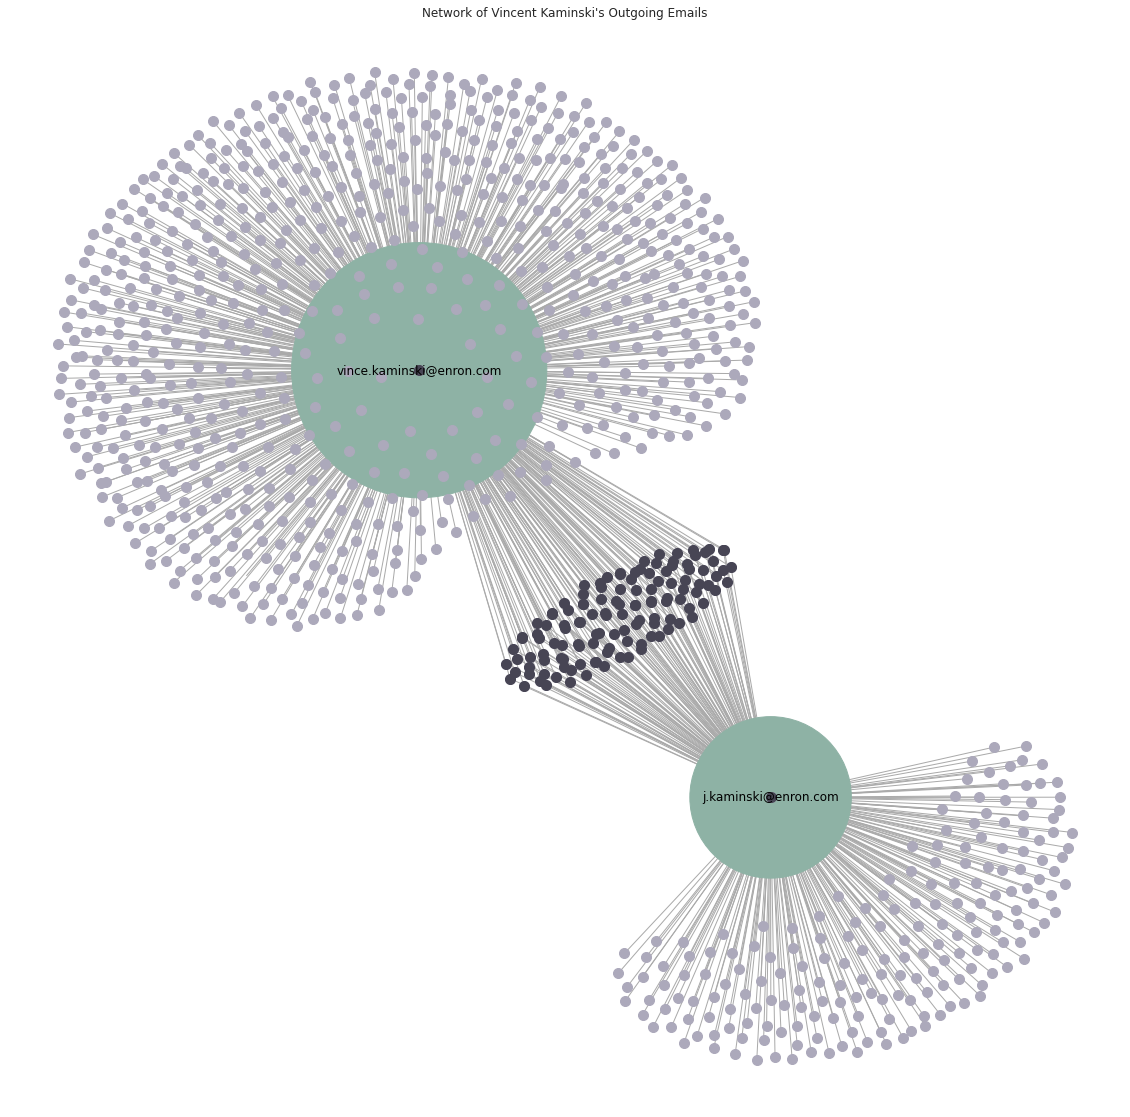

In [88]:
# create network graph for Kaminski
G_kam = nx.from_pandas_edgelist(kaminski_edges, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_kam = plt.figure(figsize=(20, 20))

# create a layout for the nodes
layout_kam = nx.spring_layout(G_kam, iterations=50)

# draw the edges
nx.draw_networkx_edges(G_kam, layout_kam, edge_color='#AAAAAA')

# create and draw sender nodes, sized according to their number of connections
sender_kam = [node for node in G_kam.nodes() if node in kaminski_edges['sender'].unique()]
size_kam = [G_kam.degree(node) * 80 for node in G_kam.nodes() if node in kaminski_edges['sender'].unique()]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=sender_kam, node_size=size_kam, node_color='#8EB2A5')

# create and draw all recipient nodes
recipients_kam = [node for node in G_kam.nodes() if node in kaminski_edges['recipient'].unique()]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=recipients_kam, node_size=100, node_color='#ACA9BB')

# create and draw popular recipients
high_degree_recipients_kam = [node for node in G_kam.nodes() if node in kaminski_edges['recipient'].unique() and G_kam.degree(node) > 1]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=high_degree_recipients_kam, node_size=100, node_color='#474554')

# label the sender nodes
sender_dict_kam = dict(zip(sender_kam, sender_kam))
nx.draw_networkx_labels(G_kam, layout_kam, labels=sender_dict_kam)

plt.axis('off')
plt.title('Network of Vincent Kaminski\'s Outgoing Emails')
plt.legend()
plt.show()
fig_kam.savefig('../plots/kaminski_network1.png')

## Kaminskis Top10 Network

/home/agnes/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



ValueError: setting an array element with a sequence.

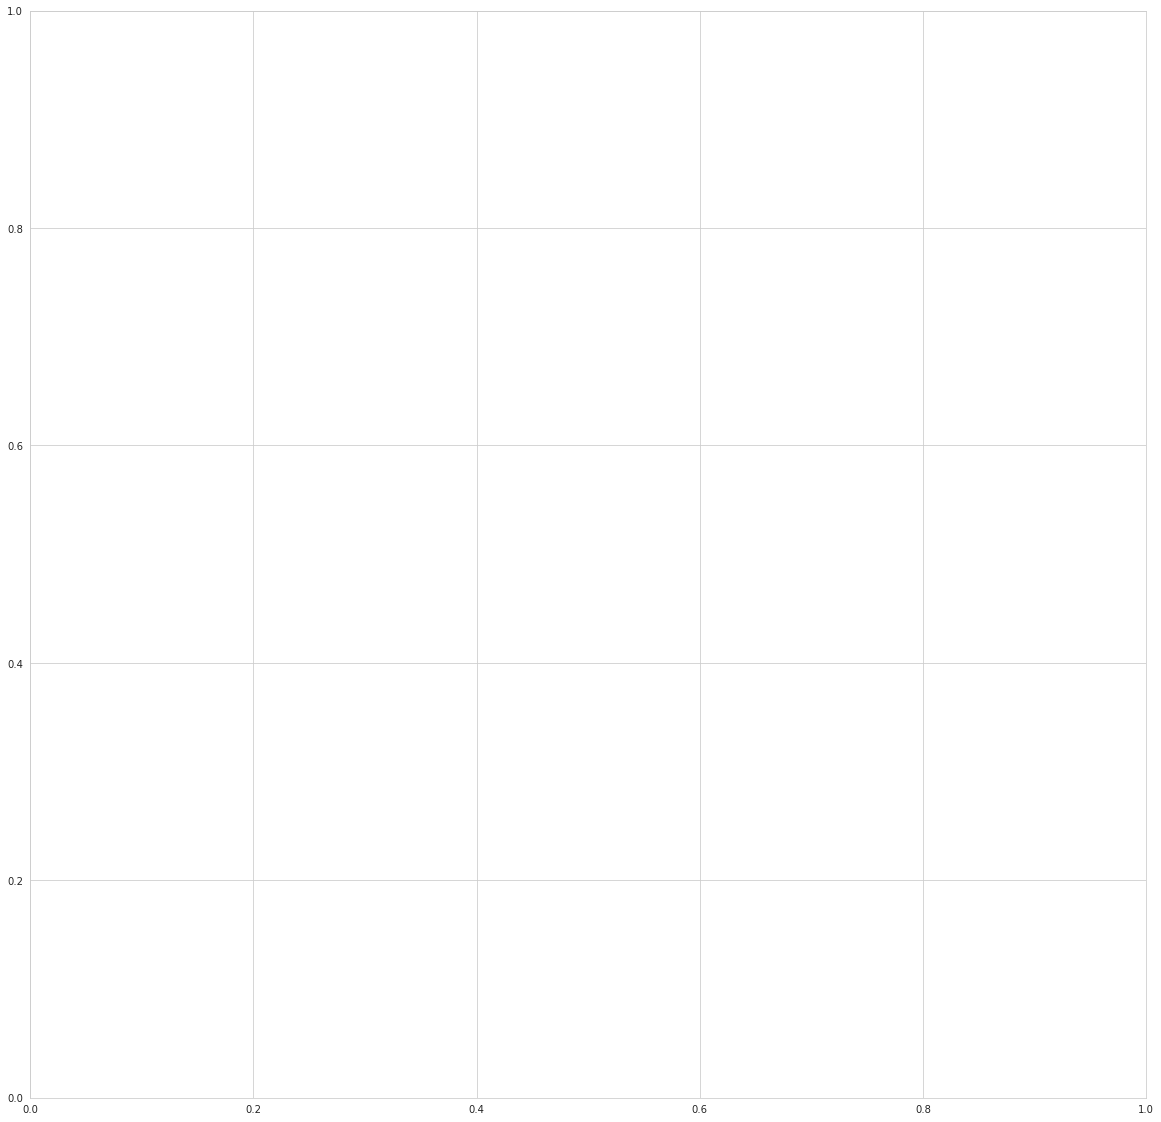

In [104]:
# create network graph for Kaminski
G_top = nx.from_pandas_edgelist(kaminski_top10, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_top = plt.figure(figsize=(20, 20))

# create a layout for the nodes
layout_top = nx.DiGraph(G_top)

# draw the edges
nx.draw_networkx_edges(G_top, layout_top, edge_color='#AAAAAA')

# create and draw sender nodes, sized according to their number of connections
sender_top = [node for node in G_kam.nodes() if node in kaminski_top10['sender'].unique()]
size_top = [G_top.degree(node) * 150 for node in G_top.nodes() if node in kaminski_top10['sender'].unique()]
nx.draw_networkx_nodes(G_top, layout_top, nodelist=sender_top, node_size=size_top, node_color='#8EB2A5', label=kaminski_top10['sender'].unique())

# create and draw all recipient nodes
recipients_top = [node for node in G_top.nodes() if node in kaminski_top10['recipient'].unique()]
size_rec = [G_top.degree(node) * 150 for node in G_top.nodes() if node in kaminski_top10['recipient'].unique()]
nx.draw_networkx_nodes(G_top, layout_top, nodelist=recipients_top, node_size=size_rec, node_color='#ACA9BB', label=kaminski_top10['sender'].unique())

# label the sender nodes
dict_top = dict(zip(layout_top.keys(), layout_top.keys()))
nx.draw_networkx_labels(G_top, layout_top, labels=dict_top)

plt.axis('off')
plt.title('Top 10 Recipients in Vincent Kaminski\'s Outgoing Emails')
plt.margins(x=0.2, y=0.2, tight=False)
plt.show()
fig_top.savefig('../plots/kaminski_network_top10.png')

In [99]:
recipients_top

['vince.kaminski@enron.com',
 'vkaminski@aol.com',
 'shirley.crenshaw@enron.com',
 'stinson.gibner@enron.com',
 'vasant.shanbhogue@enron.com',
 'mike.roberts@enron.com',
 'grant.masson@enron.com',
 'pinnamaneni.krishnarao@enron.com']

In [100]:
layout_top

{'vince.kaminski@enron.com': array([0.03185576, 0.07425955]),
 'vkaminski@aol.com': array([-0.13923535,  0.36170398]),
 'shirley.crenshaw@enron.com': array([0.18510857, 0.42447858]),
 'stinson.gibner@enron.com': array([0.56427426, 0.08701686]),
 'j.kaminski@enron.com': array([-0.19031921,  0.93705247]),
 'vasant.shanbhogue@enron.com': array([-0.47808273, -0.51307148]),
 'mike.roberts@enron.com': array([ 0.85317921, -0.45554803]),
 'grant.masson@enron.com': array([-0.97637431,  0.08410807]),
 'pinnamaneni.krishnarao@enron.com': array([ 0.1495938, -1.       ])}

(-0.914556957819474,
 0.853113253585845,
 -1.0942522485119646,
 0.9792972187512554)

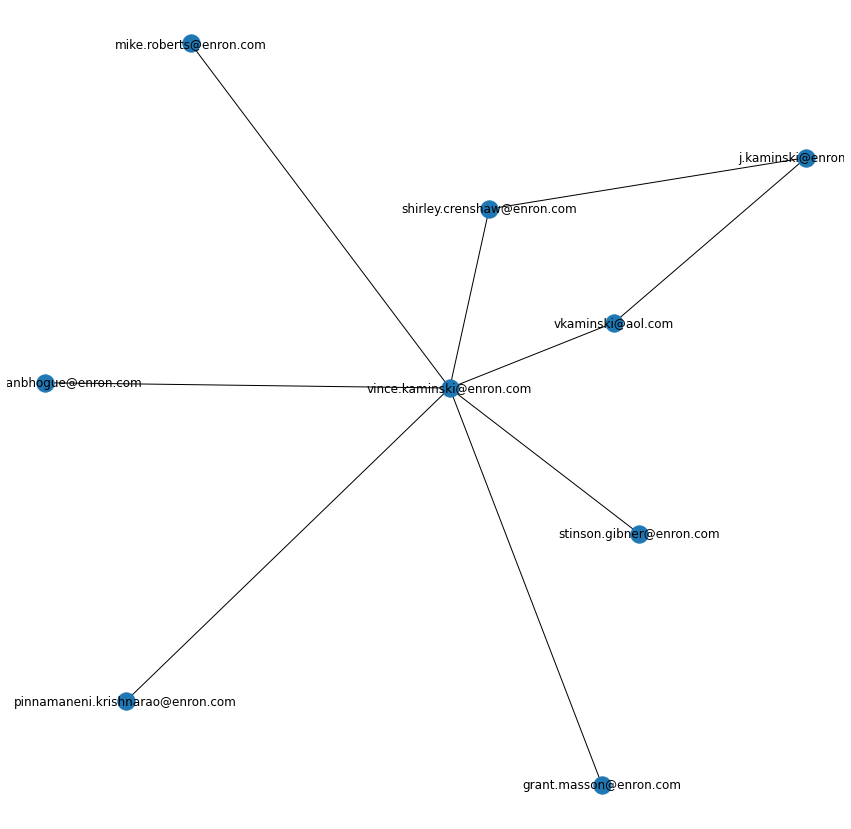

In [81]:
fig = plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G_top, k=0.5, weight='num_emails')
nx.draw_networkx(G_top, pos)
nx.draw_networkx_labels()

plt.axis('off')

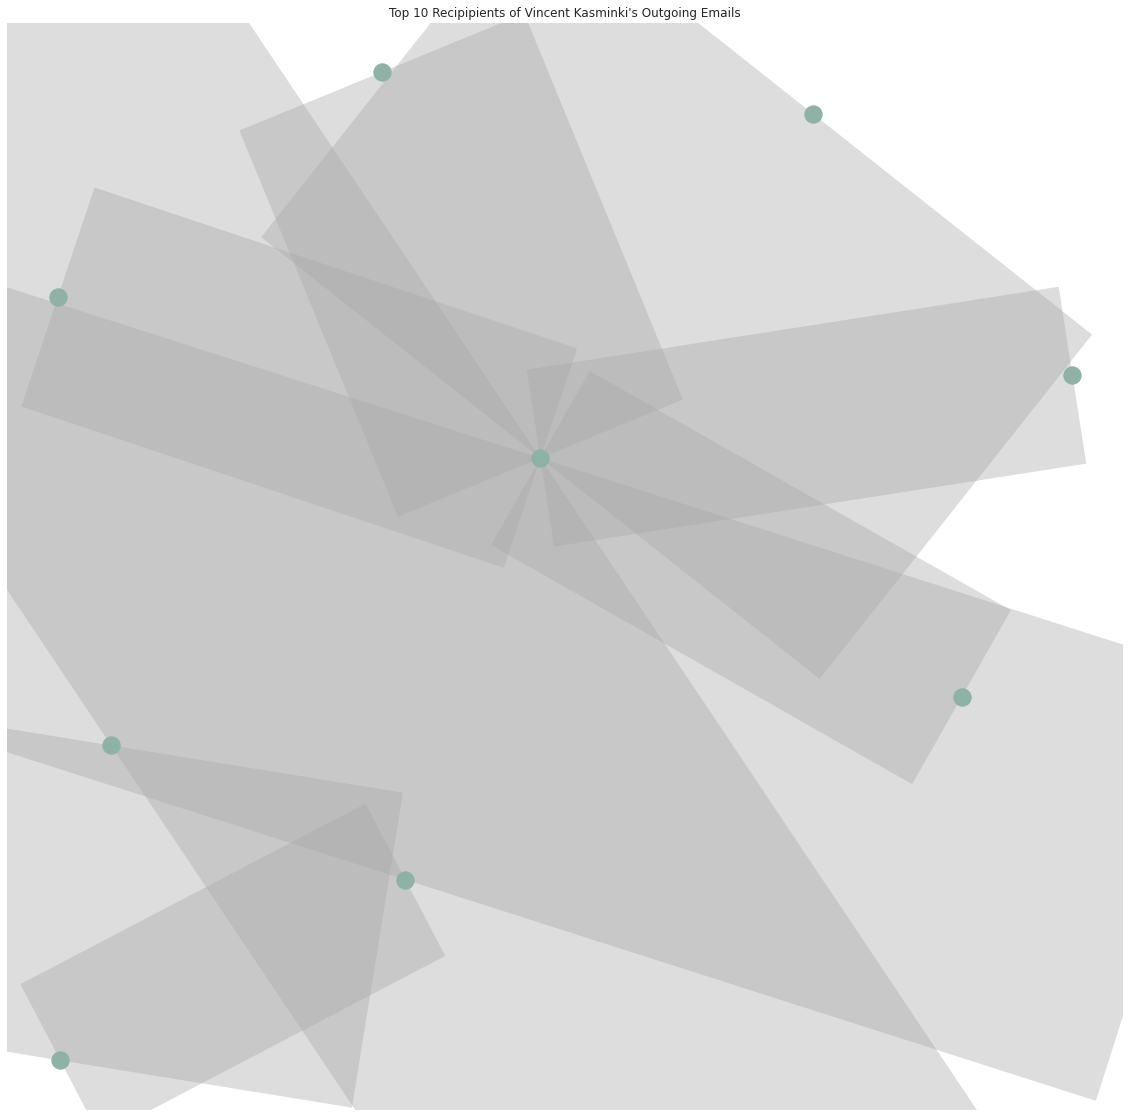

In [56]:
"""G_top = nx.from_pandas_edgelist(kaminski_top10, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_top = plt.figure(figsize=(20, 20))

emails = [i['num_emails'] for i in dict(G_top.edges).values()]
persons = [i for i in dict(G_top.nodes).keys()]
persons = {i:i for i in dict(G_top.nodes).keys()}

pos = nx.spring_layout(G_top, iterations=50)
nx.draw_networkx_nodes(G_top, pos, label=persons, node_color='#8EB2A5')
nx.draw_networkx_edges(G_top, pos, width=emails, edge_color='#AAAAAA', alpha=0.4)

plt.axis('off')
plt.title('Top 10 Recipipients of Vincent Kaminski\'s Outgoing Emails')
plt.show()
fig_top.savefig('../plots/kaminski_network_top10.png')
"""

## Degree Centrality
Measures the extent to which a given node is connected to all the other nodes

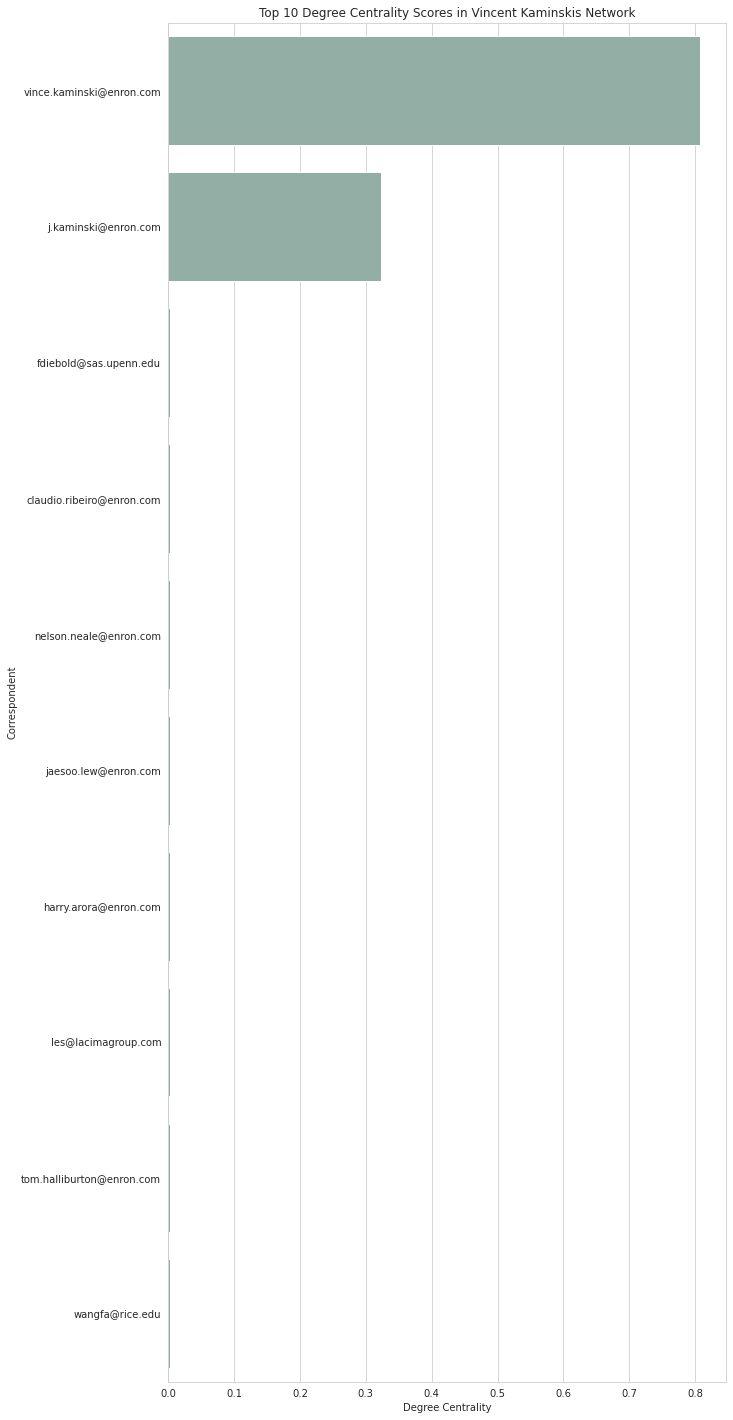

In [46]:
cent = nx.degree_centrality(G_kam)
name = []
centrality = []

for key, value in cent.items():
    name.append(key)
    centrality.append(value)

cent = pd.DataFrame()    
cent['name'] = name
cent['centrality'] = centrality
cent = cent.sort_values(by='centrality', ascending=False)

fig_cent = plt.figure(figsize=(10, 25))
_ = sns.barplot(x='centrality', y='name', data=cent[:10], orient='h', color='#8EB2A5')
_ = plt.xlabel('Degree Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 10 Degree Centrality Scores in Vincent Kaminskis Network')
plt.show()
fig_cent.savefig('../plots/kaminski_centrality.png')

In [ ]:
## Betweenness Centrality

# Network Viz Lay

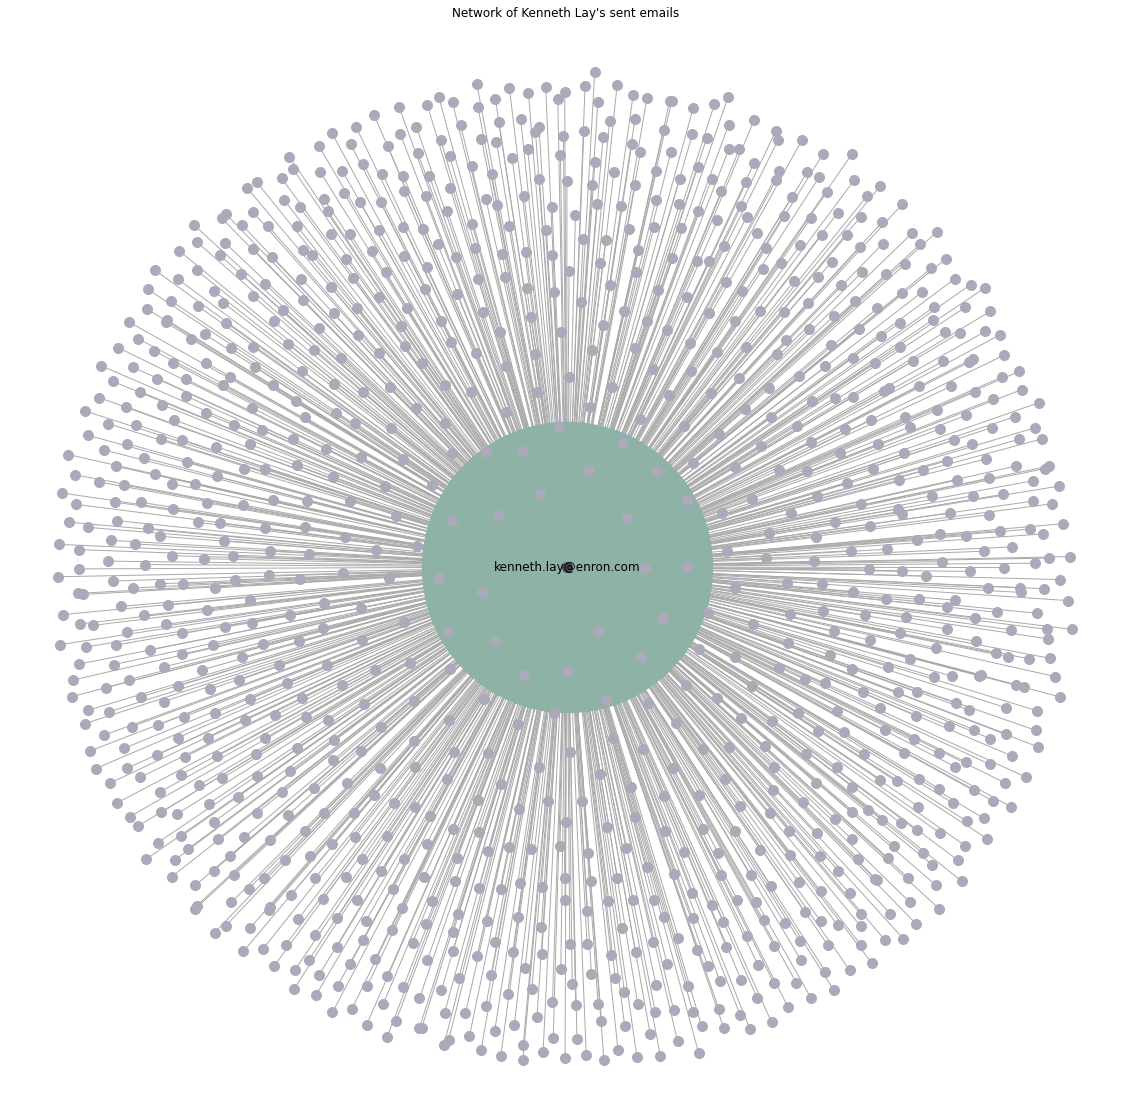

In [29]:
# create network graph for Kaminski
G_lay = nx.from_pandas_edgelist(lay_edges, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_lay = plt.figure(figsize=(20, 20))

# create a layout for the nodes
layout_lay = nx.spring_layout(G_lay, iterations=50)

# draw the edges
nx.draw_networkx_edges(G_lay, layout_lay, edge_color='#AAAAAA')

# create and draw sender nodes, sized according to their number of connections
sender_lay = [node for node in G_lay.nodes() if node in lay_edges['sender'].unique()]
size_lay = [G_lay.degree(node) * 80 for node in G_lay.nodes() if node in lay_edges['sender'].unique()]
nx.draw_networkx_nodes(G_lay, layout_lay, nodelist=sender_lay, node_size=size_lay, node_color='#8EB2A5')

# create and draw all recipient nodes
recipients_lay = [node for node in G_lay.nodes() if node in lay_edges['recipient'].unique()]
nx.draw_networkx_nodes(G_lay, layout_lay, nodelist=recipients_lay, node_size=100, node_color='#ACA9BB')

# create and draw popular recipients
high_degree_recipients_lay = [node for node in G_lay.nodes() if node in lay_edges['recipient'].unique() and G_lay.degree(node) > 1]
nx.draw_networkx_nodes(G_lay, layout_lay, nodelist=high_degree_recipients_lay, node_size=100, node_color='#474554')

# label the sender nodes
sender_dict_lay = dict(zip(sender_lay, sender_lay))
nx.draw_networkx_labels(G_lay, layout_lay, labels=sender_dict_lay)

plt.axis('off')
plt.title('Network of Kenneth Lay\'s sent emails')
plt.show()
fig_lay.savefig('../plots/lay_network.png')

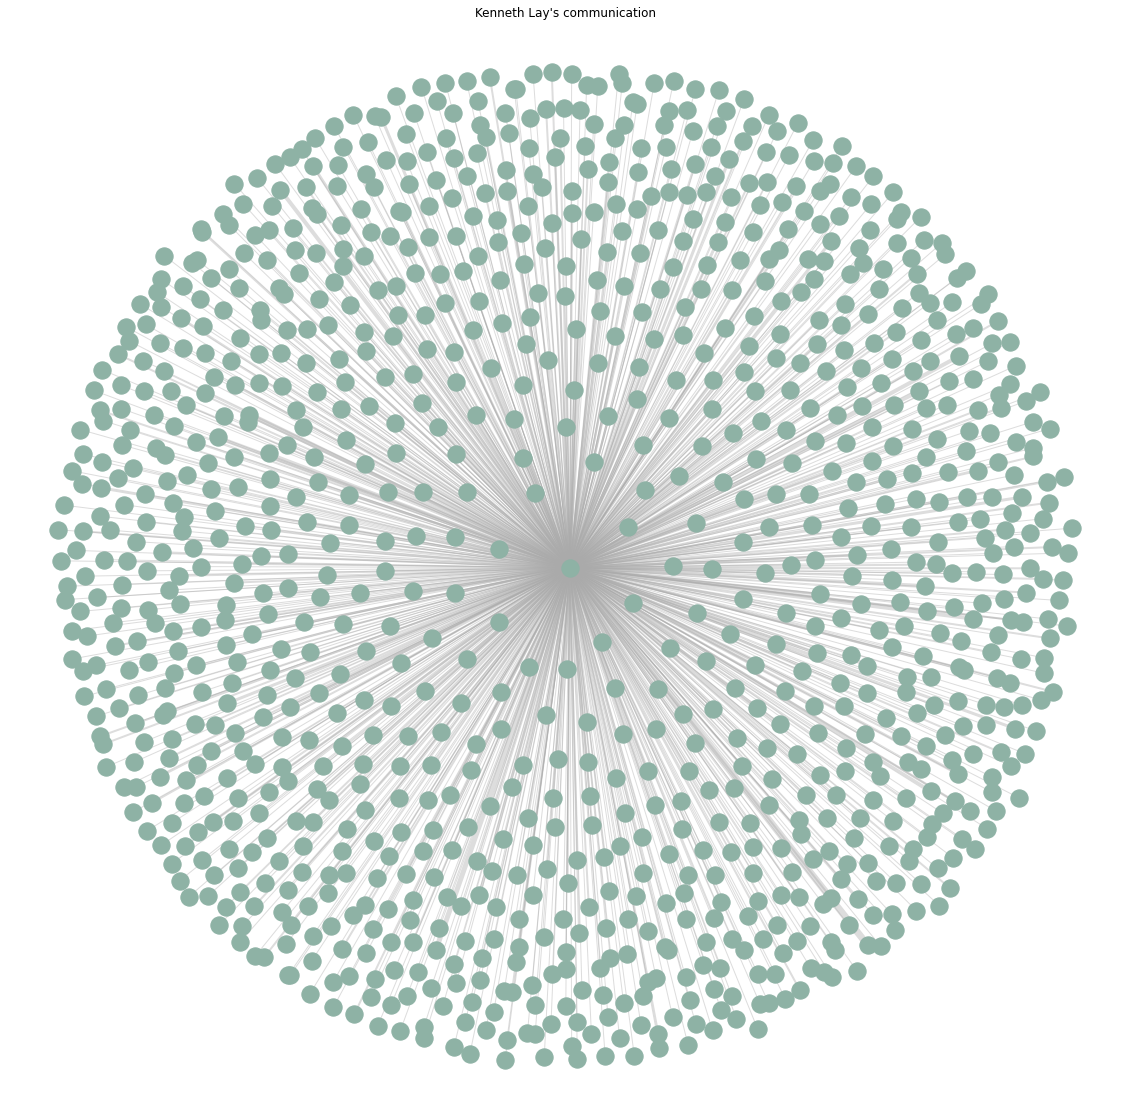

In [30]:
# create nodes and edges
emails = [i['num_emails'] for i in dict(G_lay.edges).values()]
persons = [i for i in dict(G_lay.nodes).keys()]
persons = {i:i for i in dict(G_lay.nodes).keys()}

fig_lay2 = plt.figure(figsize=(20, 20))

pos = nx.spring_layout(G_lay,)
nx.draw_networkx_nodes(G_lay, pos, label=persons, node_color='#8EB2A5')
nx.draw_networkx_edges(G_lay, pos, width=emails, alpha=0.4, edge_color='#AAAAAA')

plt.axis('off')
plt.title('Kenneth Lay\'s communication')
fig_lay.savefig('../plots/lay_network.png')